In [65]:
!pip install opendatasets

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import opendatasets as od
import plotly.express as px

In [67]:
od.download('https://www.kaggle.com/competitions/cs3244-rossmann-store-sales2/overview')

Skipping, found downloaded files in "./cs3244-rossmann-store-sales2" (use force=True to force download)


In [68]:
os.listdir('cs3244-rossmann-store-sales2')

['test_v2.csv', 'sample_submission.csv', 'train_v2.csv', 'store.csv']

In [69]:
ross_df=pd.read_csv('cs3244-rossmann-store-sales2/train_v2.csv',low_memory=False)
store_df=pd.read_csv('cs3244-rossmann-store-sales2/store.csv')
test_df=pd.read_csv('cs3244-rossmann-store-sales2/test_v2.csv')
submission_df=pd.read_csv('cs3244-rossmann-store-sales2/sample_submission.csv')

In [70]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-01-30,5577,616,1,1,0,0
1,2,5,2015-01-30,5919,624,1,1,0,0
2,3,5,2015-01-30,6911,678,1,1,0,0
3,4,5,2015-01-30,13307,1632,1,1,0,0
4,5,5,2015-01-30,5640,617,1,1,0,0
...,...,...,...,...,...,...,...,...,...
66895,864,3,2014-11-26,5156,626,1,1,0,0
66896,865,3,2014-11-26,9337,646,1,1,0,0
66897,866,3,2014-11-26,7973,479,1,1,0,0
66898,867,3,2014-11-26,5391,440,1,1,0,0


In [71]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [72]:
test_df

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,555,1,1,0,1
1,2,5,2015-07-31,625,1,1,0,1
2,3,5,2015-07-31,821,1,1,0,1
3,4,5,2015-07-31,1498,1,1,0,1
4,5,5,2015-07-31,559,1,1,0,1
...,...,...,...,...,...,...,...,...
33445,1111,4,2015-07-02,329,1,1,0,1
33446,1112,4,2015-07-02,577,1,1,0,1
33447,1113,4,2015-07-02,793,1,1,0,0
33448,1114,4,2015-07-02,3784,1,1,0,0


In [73]:
submission_df

,Id,Sales
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
41083,41084,1
41084,41085,1
41085,41086,1
41086,41087,1


Let's merge the information from **store_df** into **train_df** and **test_df**.

In [74]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')

In [75]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-01-30,5577,616,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-01-30,5919,624,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-01-30,6911,678,1,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-01-30,13307,1632,1,1,0,0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-01-30,5640,617,1,1,0,0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66895,864,3,2014-11-26,5156,626,1,1,0,0,a,a,1020.0,10.0,2012.0,1,45.0,2009.0,"Feb,May,Aug,Nov"
66896,865,3,2014-11-26,9337,646,1,1,0,0,d,c,2640.0,NaN,NaN,0,NaN,NaN,NaN
66897,866,3,2014-11-26,7973,479,1,1,0,0,d,a,9680.0,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
66898,867,3,2014-11-26,5391,440,1,1,0,0,d,c,21810.0,9.0,2012.0,0,NaN,NaN,NaN


###Analysis

In [76]:
merged_df.shape

(66900, 18)

In [77]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66900 entries, 0 to 66899
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      66900 non-null  int64  
 1   DayOfWeek                  66900 non-null  int64  
 2   Date                       66900 non-null  object 
 3   Sales                      66900 non-null  int64  
 4   Customers                  66900 non-null  int64  
 5   Open                       66900 non-null  int64  
 6   Promo                      66900 non-null  int64  
 7   StateHoliday               66900 non-null  object 
 8   SchoolHoliday              66900 non-null  int64  
 9   StoreType                  66900 non-null  object 
 10  Assortment                 66900 non-null  object 
 11  CompetitionDistance        66738 non-null  float64
 12  CompetitionOpenSinceMonth  45588 non-null  float64
 13  CompetitionOpenSinceYear   45588 non-null  flo

There is a lot of missing value in the Promo2SinceWeek Promo2SinceYear     PromoInterval            

lets check it how things went in this promo season


In [78]:
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,66900.000000,66900.000000,66900.000000,66900.000000,66900.000000,66900.000000,66900.000000,66738.000000,45588.000000,45588.000000,66900.000000,31972.000000,31972.000000
mean,557.916622,4.005830,6338.682167,661.512257,0.817459,0.428550,0.180433,5481.449999,7.220014,2008.731464,0.477907,22.587858,2011.729576
std,321.544345,1.962357,4365.720737,497.418237,0.386293,0.494872,0.384551,7826.245152,3.214603,5.581532,0.499515,14.002393,1.640388
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,281.000000,2.000000,3859.000000,407.000000,1.000000,0.000000,0.000000,700.000000,4.000000,2006.000000,0.000000,10.000000,2011.000000
50%,557.000000,4.000000,6301.000000,635.000000,1.000000,0.000000,0.000000,2330.000000,8.000000,2010.000000,0.000000,18.000000,2012.000000
75%,837.000000,6.000000,8768.000000,887.000000,1.000000,1.000000,0.000000,6890.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.000000,7.000000,37122.000000,4962.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


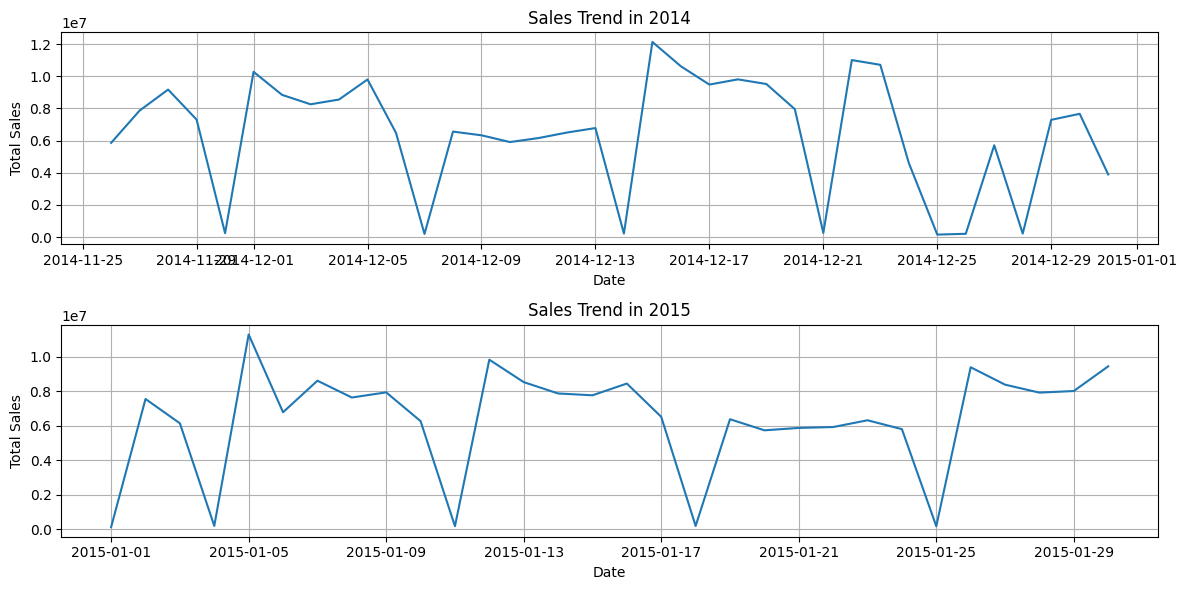

In [79]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

df_2014 = merged_df[merged_df['Date'].dt.year == 2014]
df_2015 = merged_df[merged_df['Date'].dt.year == 2015]

sales_2014 = df_2014.groupby('Date')['Sales'].sum()
sales_2015 = df_2015.groupby('Date')['Sales'].sum()

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(sales_2014.index, sales_2014.values)
plt.title('Sales Trend in 2014')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(sales_2015.index, sales_2015.values)
plt.title('Sales Trend in 2015')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)

plt.tight_layout()
plt.show()

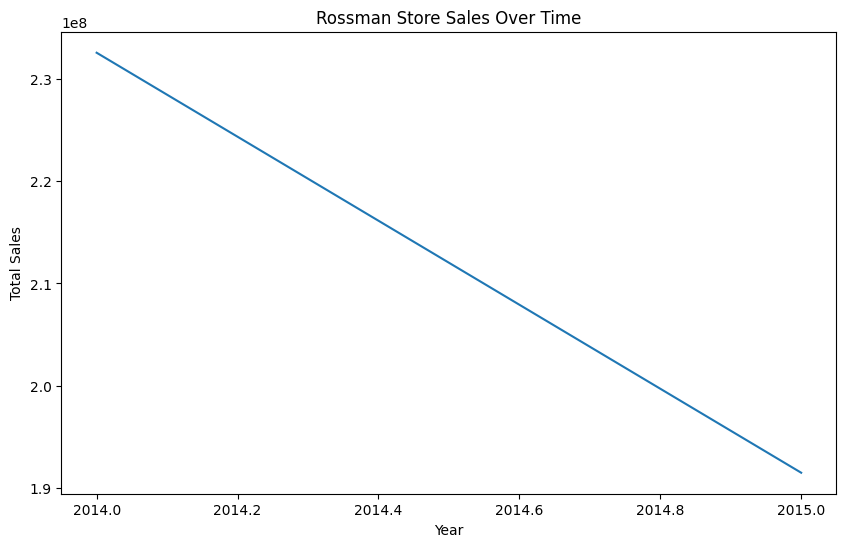

In [80]:
sales_by_year = merged_df.groupby(merged_df['Date'].dt.year)['Sales'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Rossman Store Sales Over Time')
plt.show()

<Axes: xlabel='Sales', ylabel='Count'>

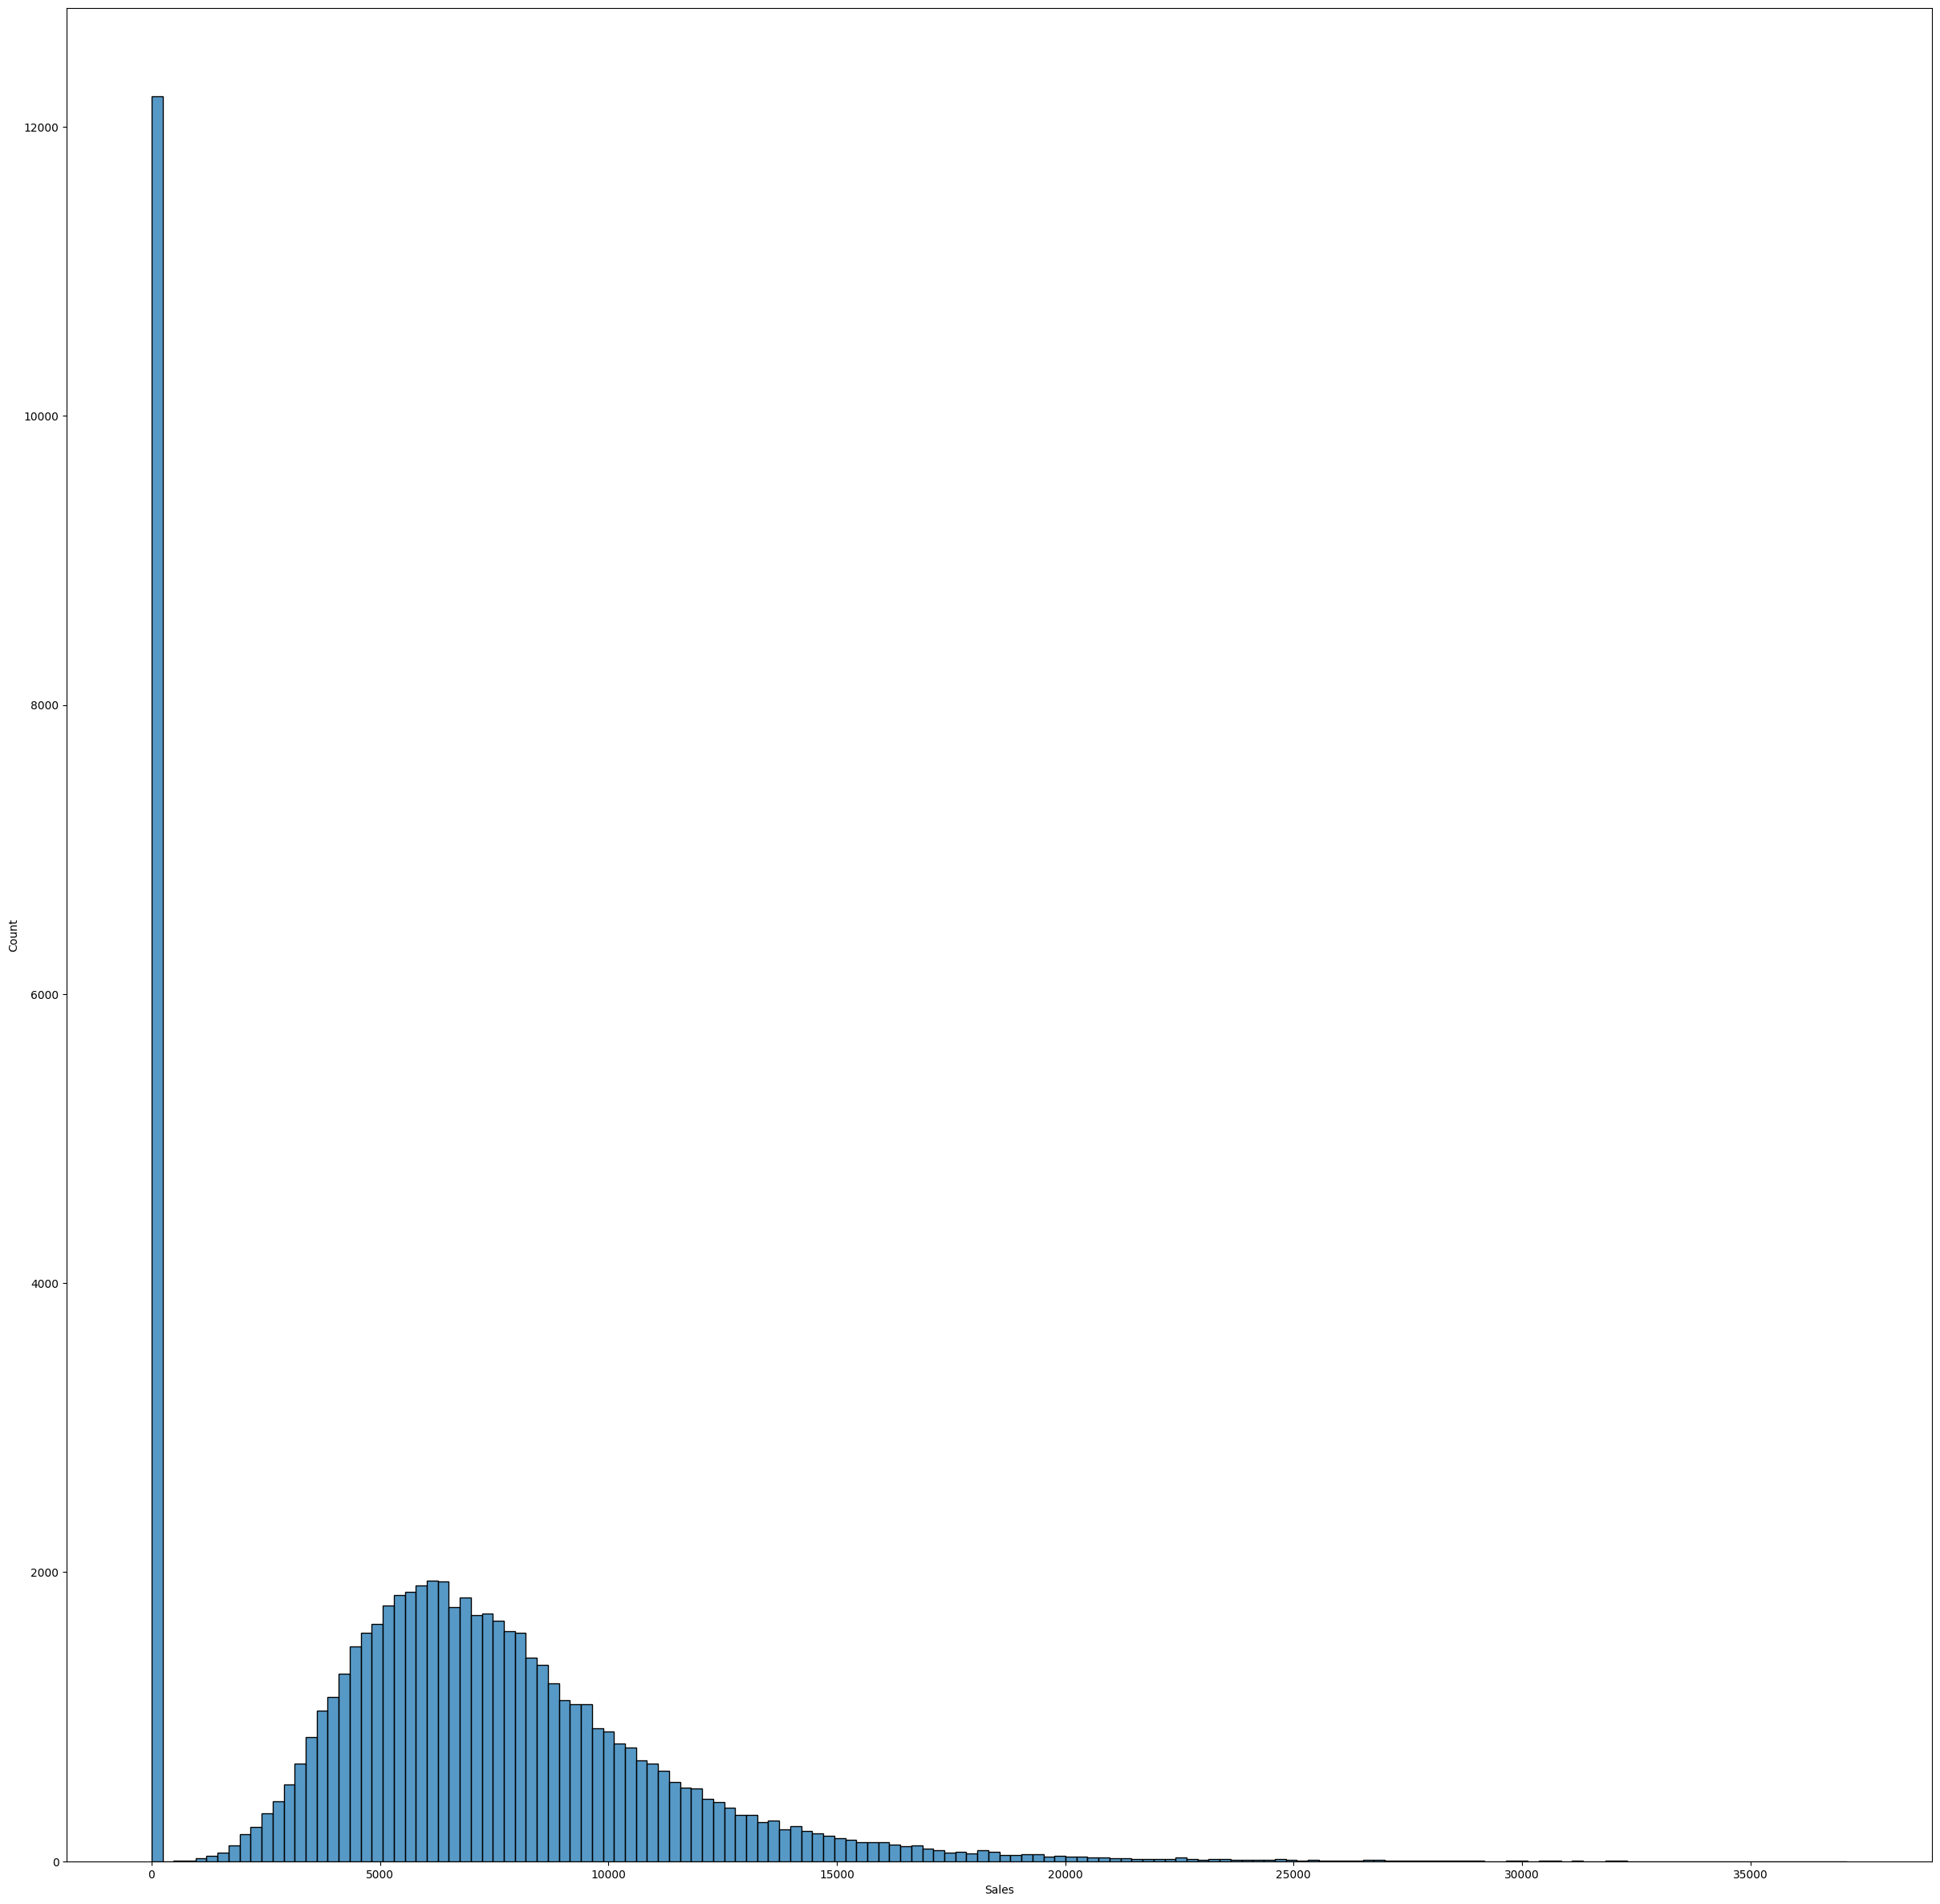

In [81]:
sns.histplot(data=merged_df, x='Sales')

Can you explain why the sales are 0 on so many dates?

Let's check if this is because the store was closed.

In [82]:
merged_df.Open.value_counts()

,count
Open,
1,54688
0,12212


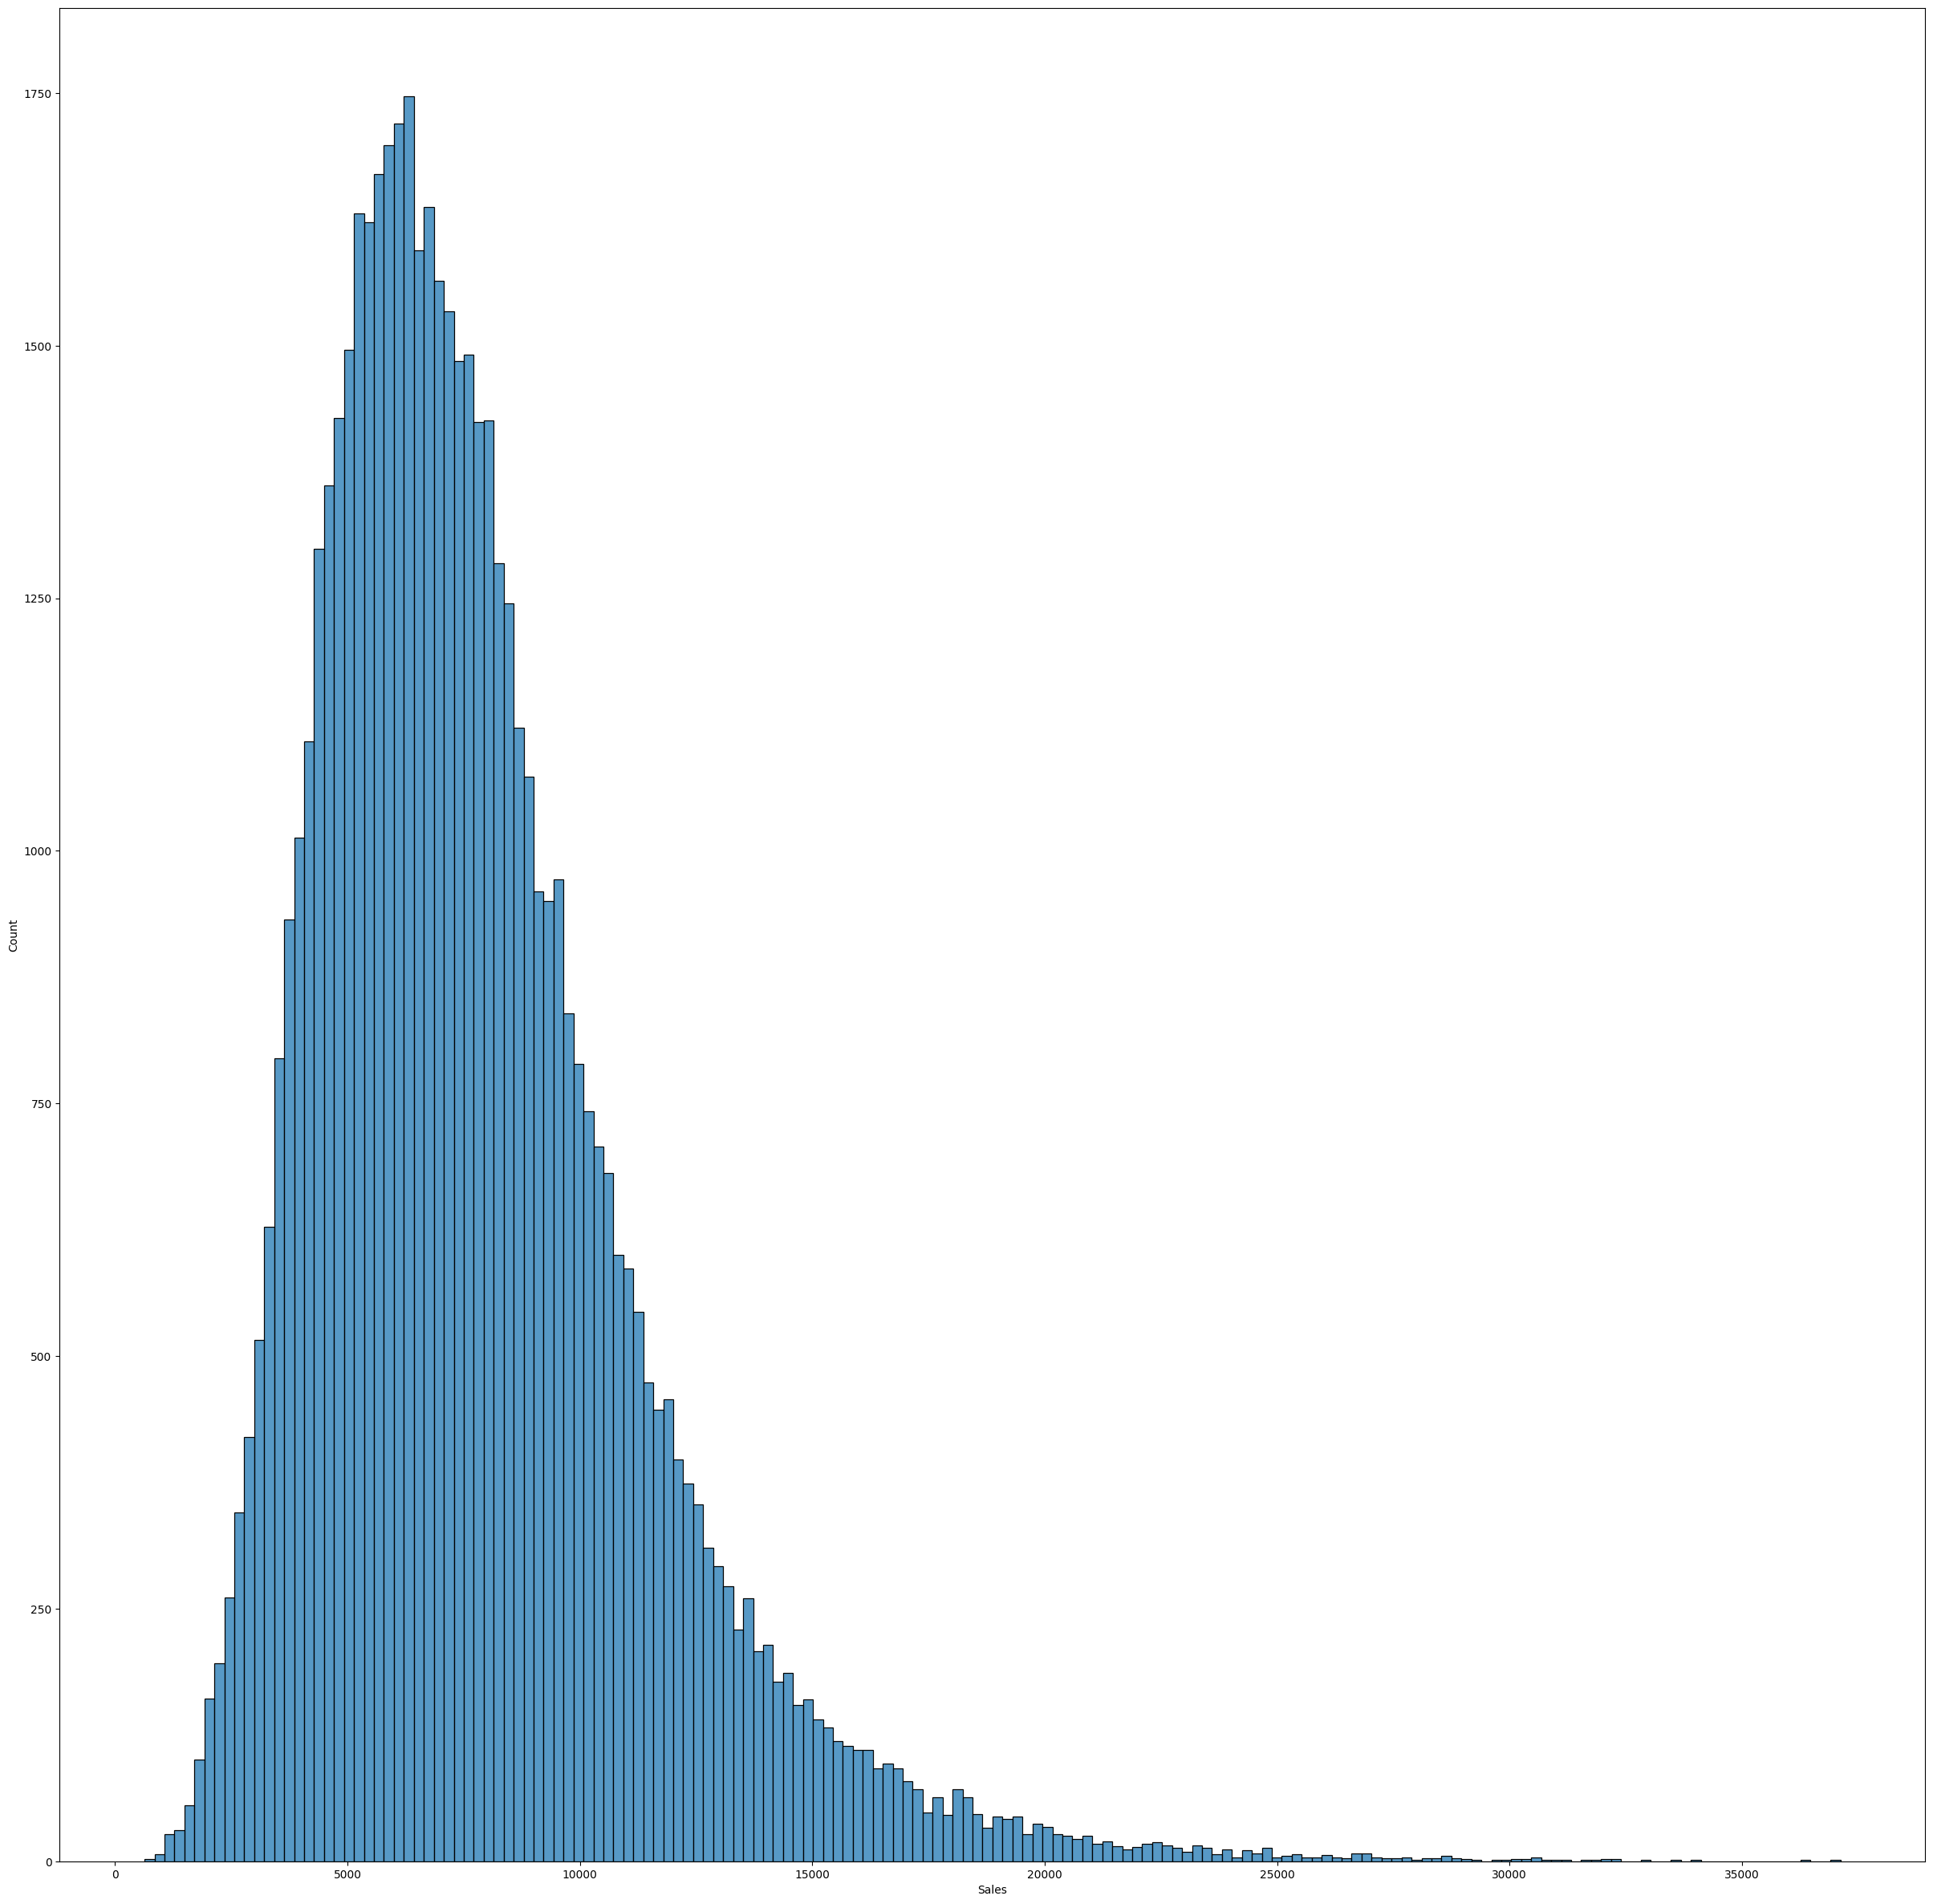

In [83]:
sns.histplot(data=merged_df[merged_df.Open!=0], x='Sales');

In [84]:
temp_df = merged_df.sample(40000)
fig = px.scatter(temp_df,
                 x='Sales',
                 y='Customers',
                 color=temp_df.Date.dt.year,
                 opacity=0.8,
                 title="Sales Vs Customers")
fig.show()

In [85]:
first_50_stores = merged_df[merged_df['Store'] <= 50]

fig = px.scatter(first_50_stores,
                 x="Store",
                 y="Sales",
                 color="Store",
                 title="Sales of the First 50 Stores",
                 labels={"Store": "Store ID", "Sales": "Total Sales"})

fig.show()

Shows the sales of first 50 stores of rossmann

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

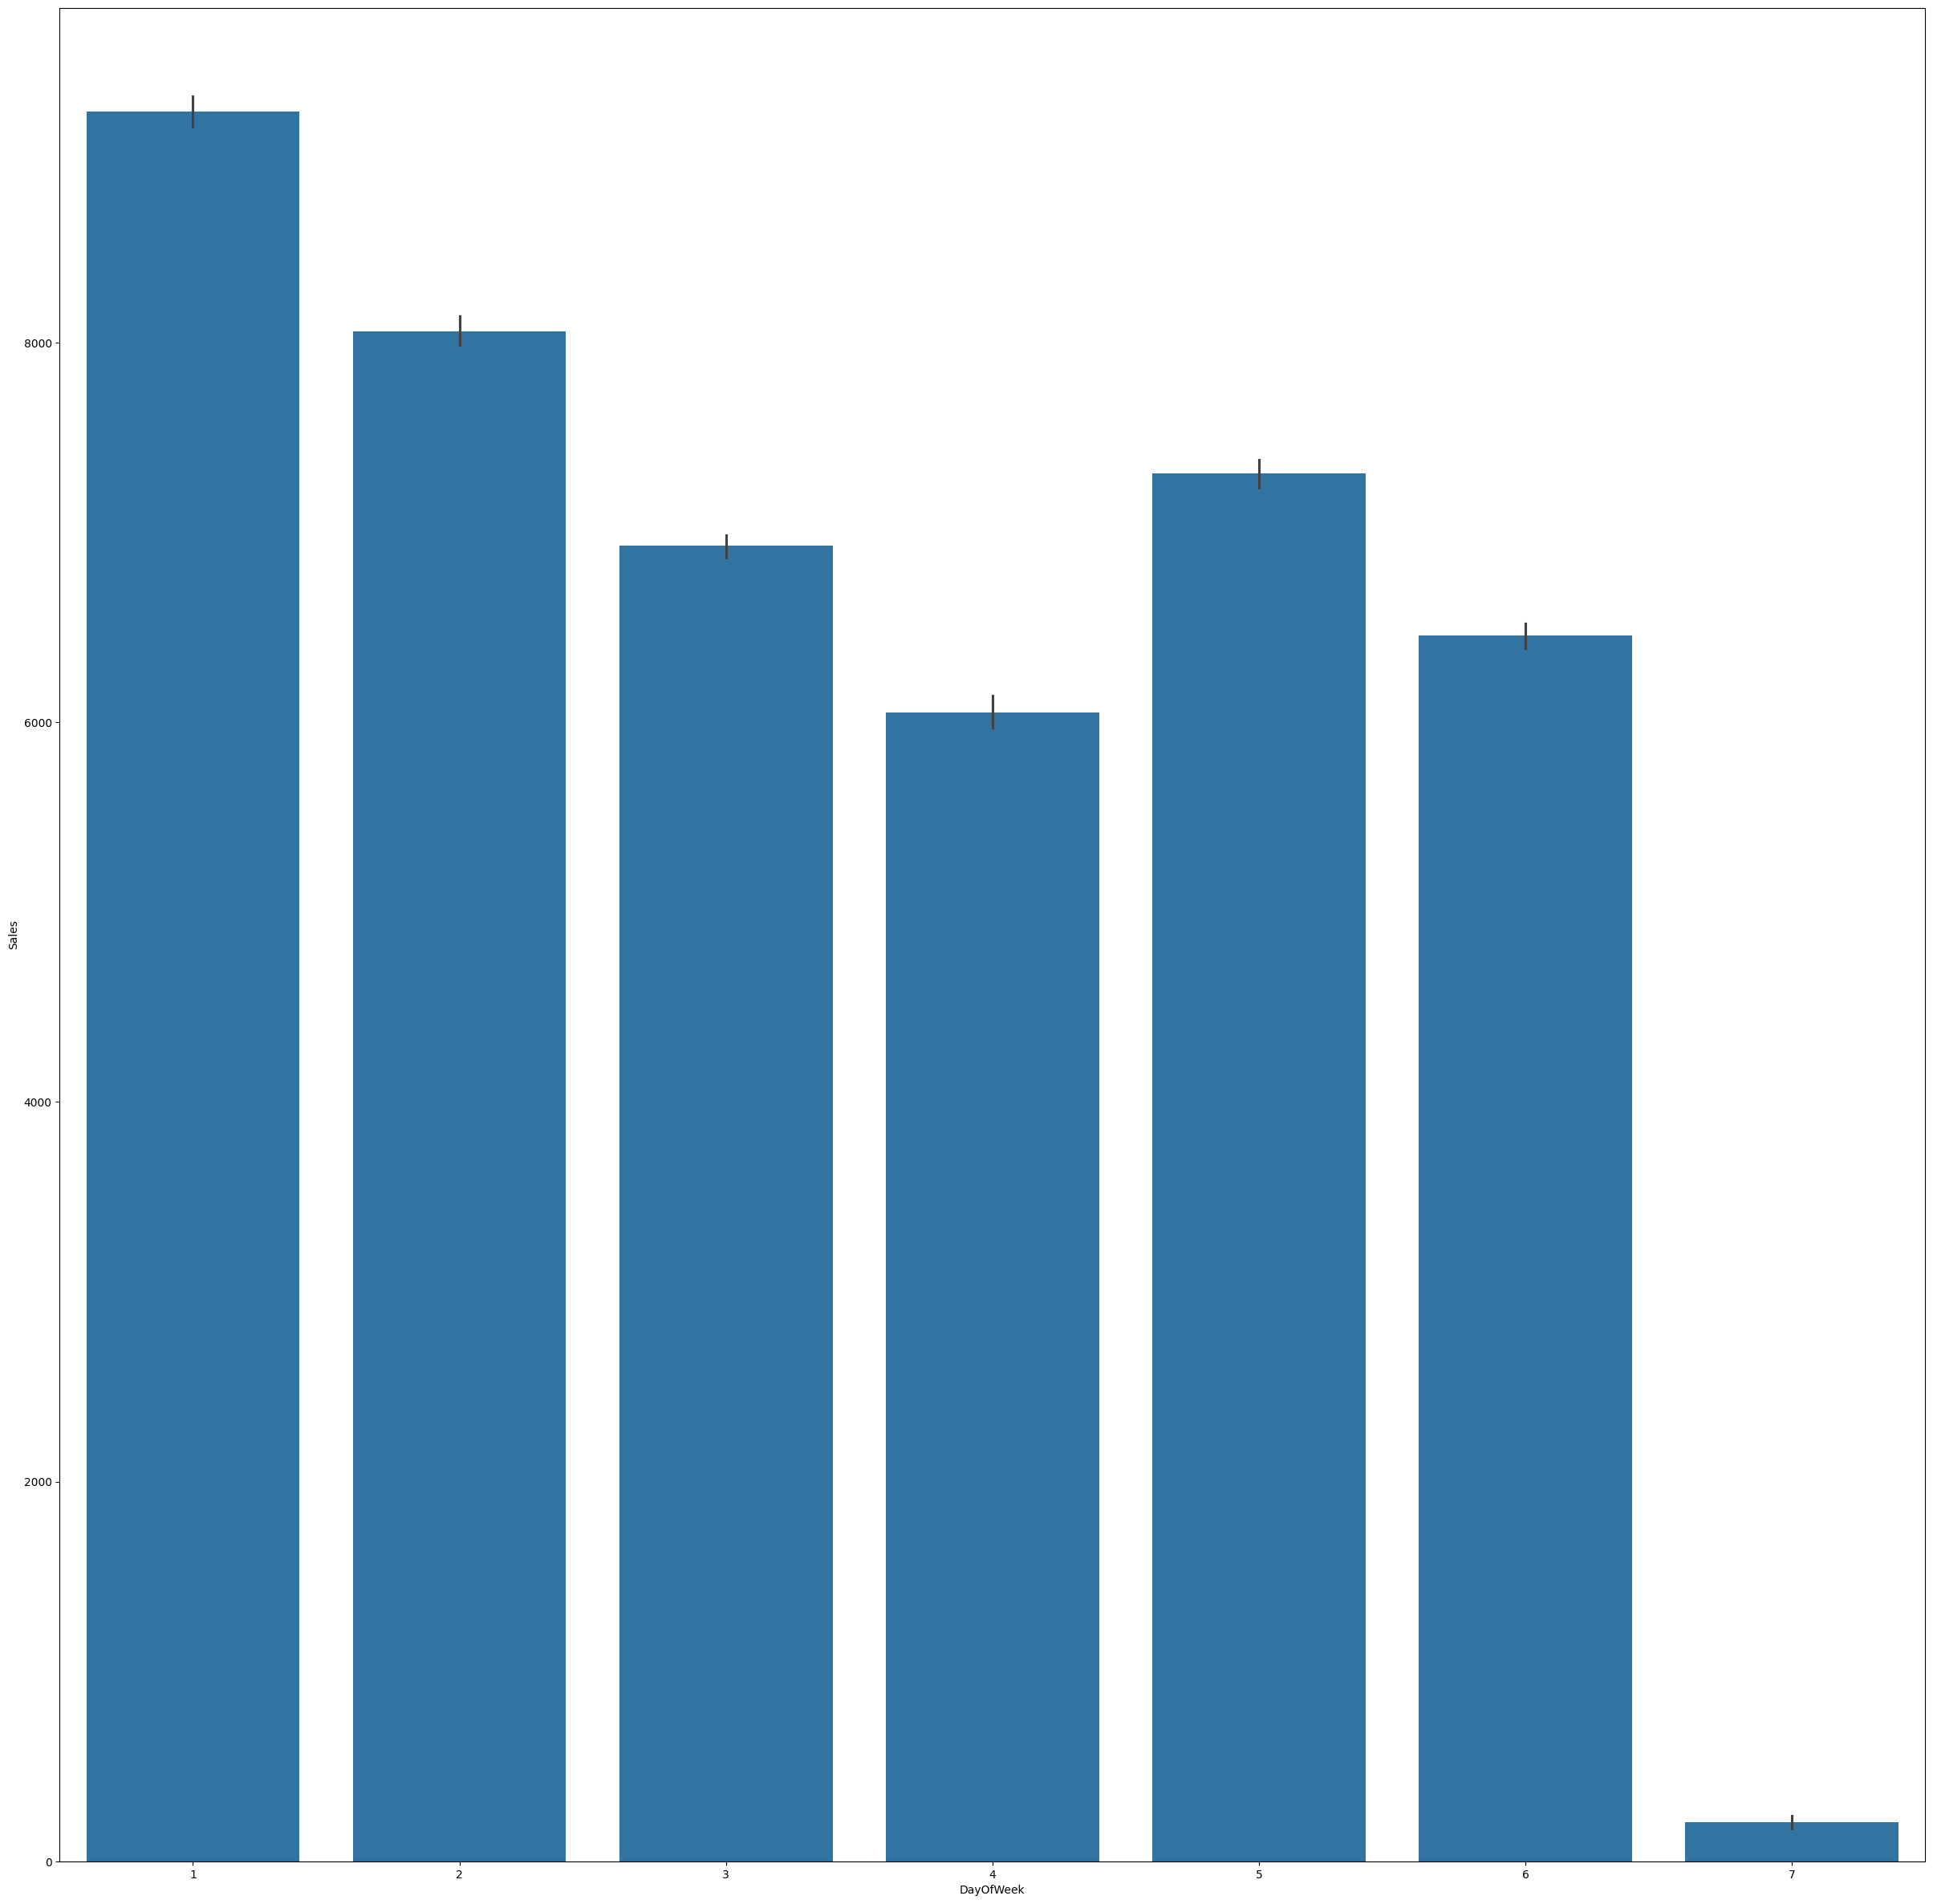

In [86]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

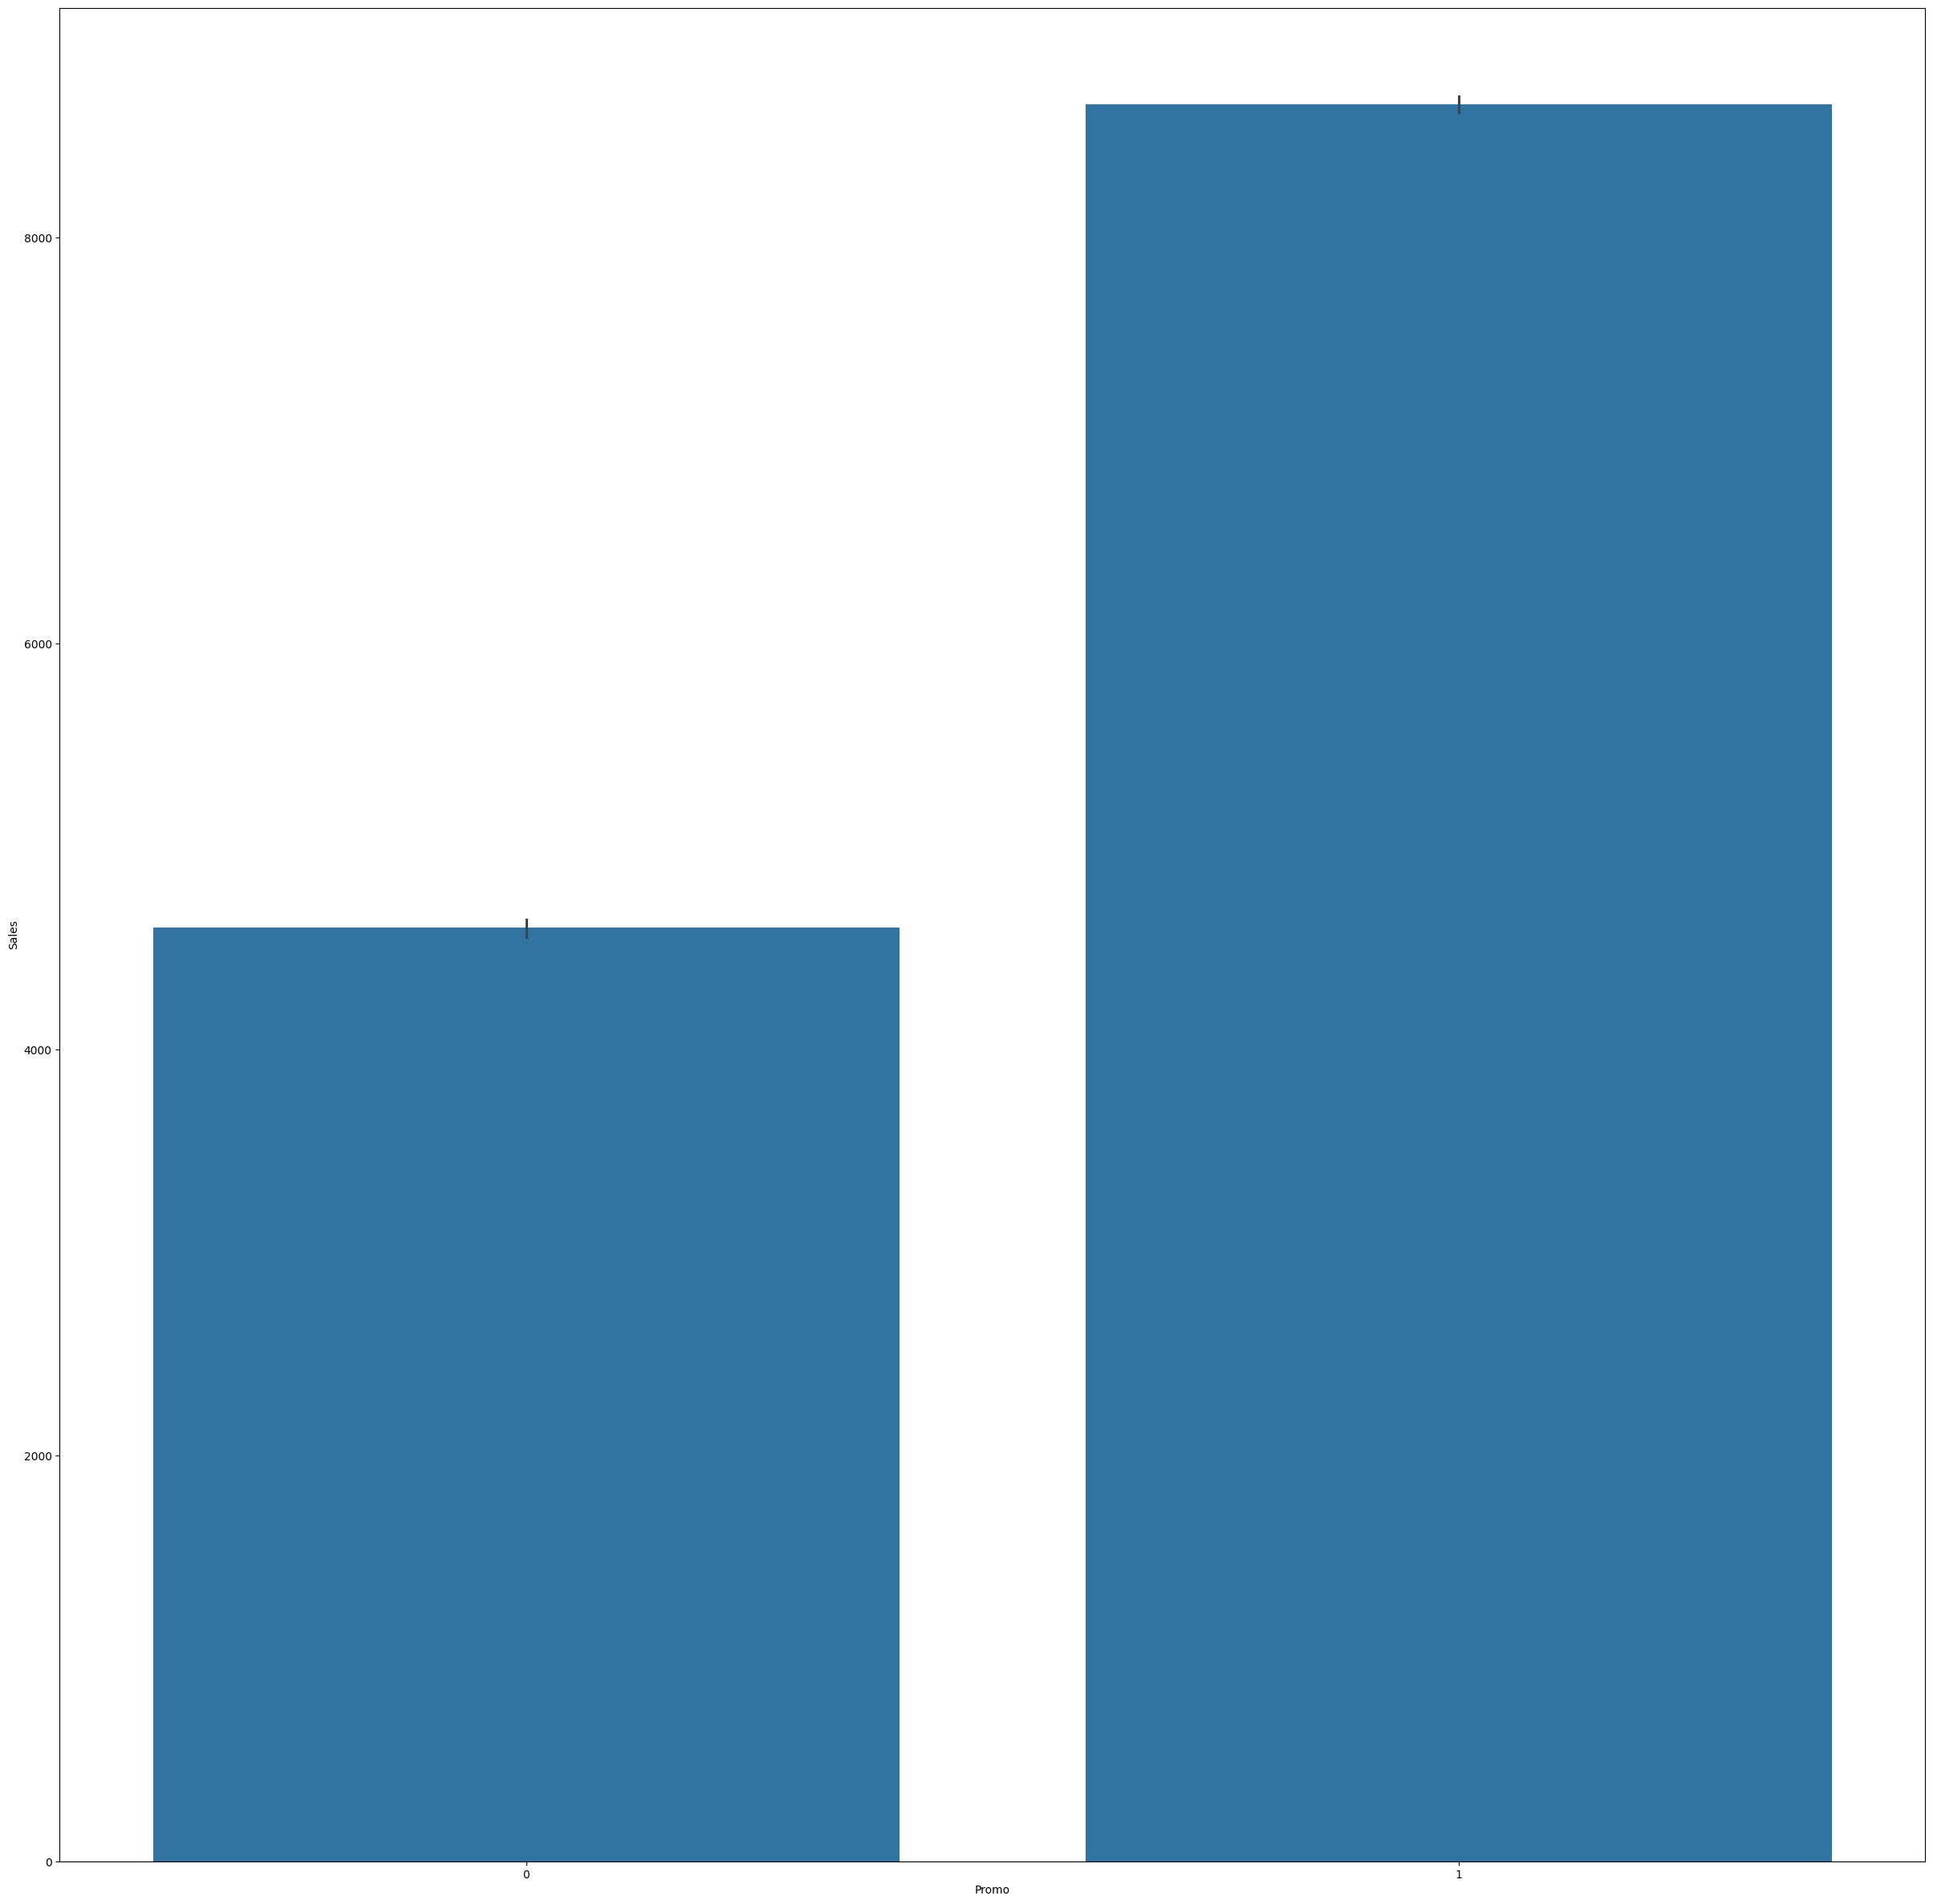

In [87]:
sns.barplot(data=merged_df, x='Promo', y='Sales')

###Date Day Split

In [88]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [89]:
split_date(merged_df)
split_date(merged_test_df)

In [90]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-01-30,5577,616,1,1,0,0,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,1,30,5
1,2,5,2015-01-30,5919,624,1,1,0,0,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,1,30,5
2,3,5,2015-01-30,6911,678,1,1,0,0,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,1,30,5
3,4,5,2015-01-30,13307,1632,1,1,0,0,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,1,30,5
4,5,5,2015-01-30,5640,617,1,1,0,0,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,1,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66895,864,3,2014-11-26,5156,626,1,1,0,0,a,...,10.0,2012.0,1,45.0,2009.0,"Feb,May,Aug,Nov",2014,11,26,48
66896,865,3,2014-11-26,9337,646,1,1,0,0,d,...,NaN,NaN,0,NaN,NaN,NaN,2014,11,26,48
66897,866,3,2014-11-26,7973,479,1,1,0,0,d,...,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",2014,11,26,48
66898,867,3,2014-11-26,5391,440,1,1,0,0,d,...,9.0,2012.0,0,NaN,NaN,NaN,2014,11,26,48


In [91]:
merged_df[merged_df.Open == 0].Sales.value_counts()

,count
Sales,
0,12212


We will remove the rows where stores are closed

In [92]:
merged_df = merged_df[merged_df.Open == 1].copy()

In [93]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [94]:
comp_months(merged_df)
comp_months(merged_test_df)

In [95]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
66209,2014-11-26,180.0,NaN,NaN,0.0
41055,2014-12-23,16420.0,NaN,NaN,0.0
16567,2015-01-16,440.0,2013.0,11.0,14.0
63924,2014-11-29,90.0,2012.0,12.0,23.0
52590,2014-12-11,120.0,NaN,NaN,0.0
50890,2014-12-13,1920.0,2005.0,4.0,116.0
52242,2014-12-11,46590.0,2013.0,4.0,20.0
2114,2015-01-29,2230.0,2009.0,5.0,68.0
57716,2014-12-06,6250.0,NaN,NaN,0.0
64918,2014-11-28,6400.0,2014.0,3.0,8.0


In [96]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-01-30,5577,616,1,1,0,0,c,...,2008.0,0,NaN,NaN,NaN,2015,1,30,5,76.0
1,2,5,2015-01-30,5919,624,1,1,0,0,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,1,30,5,86.0
2,3,5,2015-01-30,6911,678,1,1,0,0,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,1,30,5,97.0
3,4,5,2015-01-30,13307,1632,1,1,0,0,c,...,2009.0,0,NaN,NaN,NaN,2015,1,30,5,64.0
4,5,5,2015-01-30,5640,617,1,1,0,0,a,...,2015.0,0,NaN,NaN,NaN,2015,1,30,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66895,864,3,2014-11-26,5156,626,1,1,0,0,a,...,2012.0,1,45.0,2009.0,"Feb,May,Aug,Nov",2014,11,26,48,25.0
66896,865,3,2014-11-26,9337,646,1,1,0,0,d,...,NaN,0,NaN,NaN,NaN,2014,11,26,48,0.0
66897,866,3,2014-11-26,7973,479,1,1,0,0,d,...,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",2014,11,26,48,0.0
66898,867,3,2014-11-26,5391,440,1,1,0,0,d,...,2012.0,0,NaN,NaN,NaN,2014,11,26,48,26.0


In [97]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [98]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [99]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
44902,2014-12-19,0,NaN,NaN,NaN,0.000000,0
30562,2015-01-03,0,NaN,NaN,NaN,0.000000,0
46123,2014-12-18,0,NaN,NaN,NaN,0.000000,0
32012,2015-01-02,0,NaN,NaN,NaN,0.000000,0
9661,2015-01-22,0,NaN,NaN,NaN,0.000000,0
35083,2014-12-30,1,2011.0,48.0,"Mar,Jun,Sept,Dec",25.213115,1
49261,2014-12-15,0,NaN,NaN,NaN,0.000000,0
40417,2014-12-24,0,NaN,NaN,NaN,0.000000,0
64290,2014-11-29,0,NaN,NaN,NaN,0.000000,0
25248,2015-01-08,1,2009.0,45.0,"Feb,May,Aug,Nov",62.131148,0


In [100]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [101]:
input_cols=['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen',
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2',
              'Promo2Open', 'IsPromo2Month']

target_col='Sales'

In [102]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [103]:
test_inputs = merged_test_df[input_cols].copy()

In [104]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday',
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

###Impute missing numerical data


In [105]:
inputs[numeric_cols].isna().sum()

,0
Store,0
Promo,0
SchoolHoliday,0
CompetitionDistance,132
CompetitionOpen,0
Promo2,0
Promo2Open,0
IsPromo2Month,0
Day,0
Month,0


In [106]:
test_inputs[numeric_cols].isna().sum()

,0
Store,0
Promo,0
SchoolHoliday,0
CompetitionDistance,90
CompetitionOpen,0
Promo2,0
Promo2Open,0
IsPromo2Month,0
Day,0
Month,0


Seems like competition distance is the only missing value, and we can simply fill it with the highest value (to indicate that competition is very far away).

In [107]:
max_distance = inputs.CompetitionDistance.max()
max_distance

75860.0

In [108]:
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

<ipython-input-108-8b01b25bebb5>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-108-8b01b25bebb5>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

### Scale Numeric Values


In [109]:
from sklearn.preprocessing import MinMaxScaler

In [110]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [111]:
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

<ipython-input-111-8b01b25bebb5>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-111-8b01b25bebb5>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

### Encode Categorical Columns

In [112]:
from sklearn.preprocessing import OneHotEncoder

In [113]:
inputs[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 54688 entries, 0 to 66899
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DayOfWeek     54688 non-null  int64 
 1   StateHoliday  54688 non-null  object
 2   StoreType     54688 non-null  object
 3   Assortment    54688 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.1+ MB


In [114]:
nan_counts = inputs[categorical_cols].isna().sum()
nan_counts

,0
DayOfWeek,0
StateHoliday,0
StoreType,0
Assortment,0


In [115]:
inputs[categorical_cols] = inputs[categorical_cols].astype(str)
test_inputs[categorical_cols] = test_inputs[categorical_cols].astype(str)

In [116]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [117]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [118]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

### Training

In [119]:
from xgboost import XGBRegressor

In [120]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [121]:
%%time
model.fit(X, targets)

CPU times: user 585 ms, sys: 4.08 ms, total: 589 ms
Wall time: 750 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

### Prediction

In [122]:
preds = model.predict(X)

In [123]:
preds

array([7668.4883, 7462.5864, 7449.685 , ..., 6608.2983, 8358.449 ,
       8536.849 ], dtype=float32)

### Evaluation

In [124]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return np.sqrt(mean_squared_error(a, b))

In [125]:
rmse(preds, targets)

2472.797302651392

### Visualization

In [128]:
from matplotlib.pylab import rcParams
from xgboost import plot_tree
rcParams['figure.figsize'] = 30,30

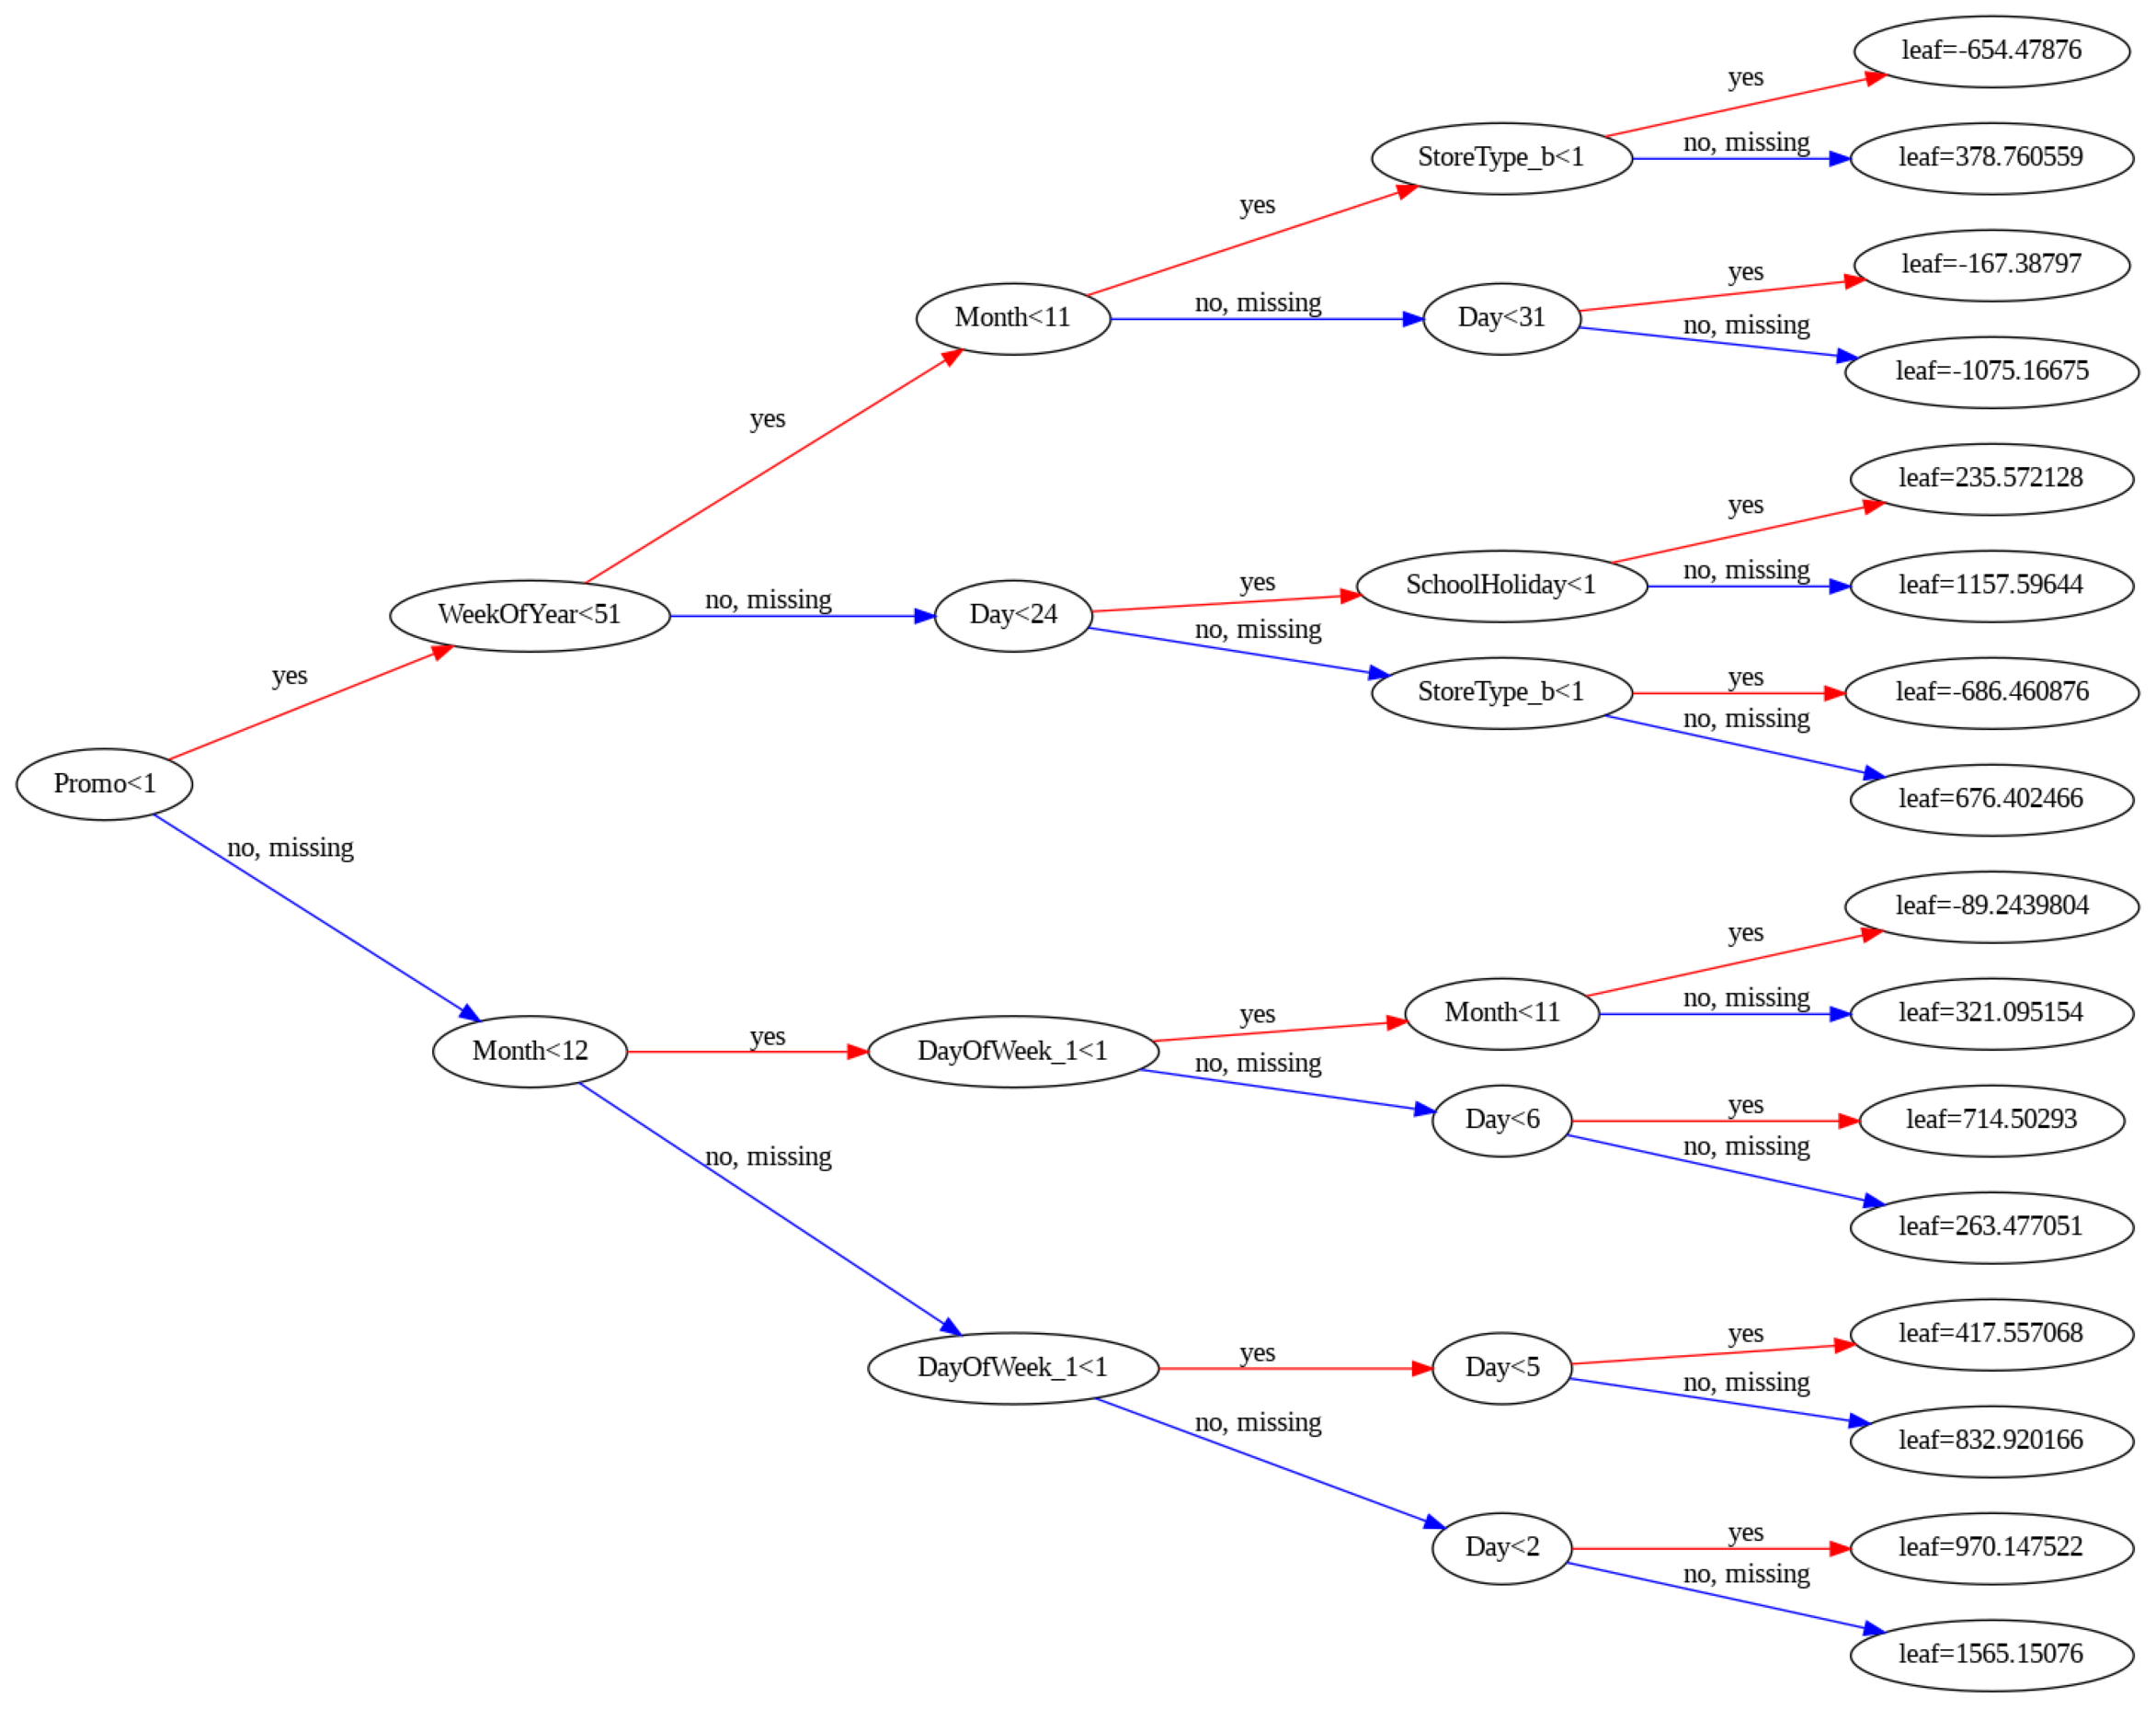

In [129]:
plot_tree(model, rankdir='LR');

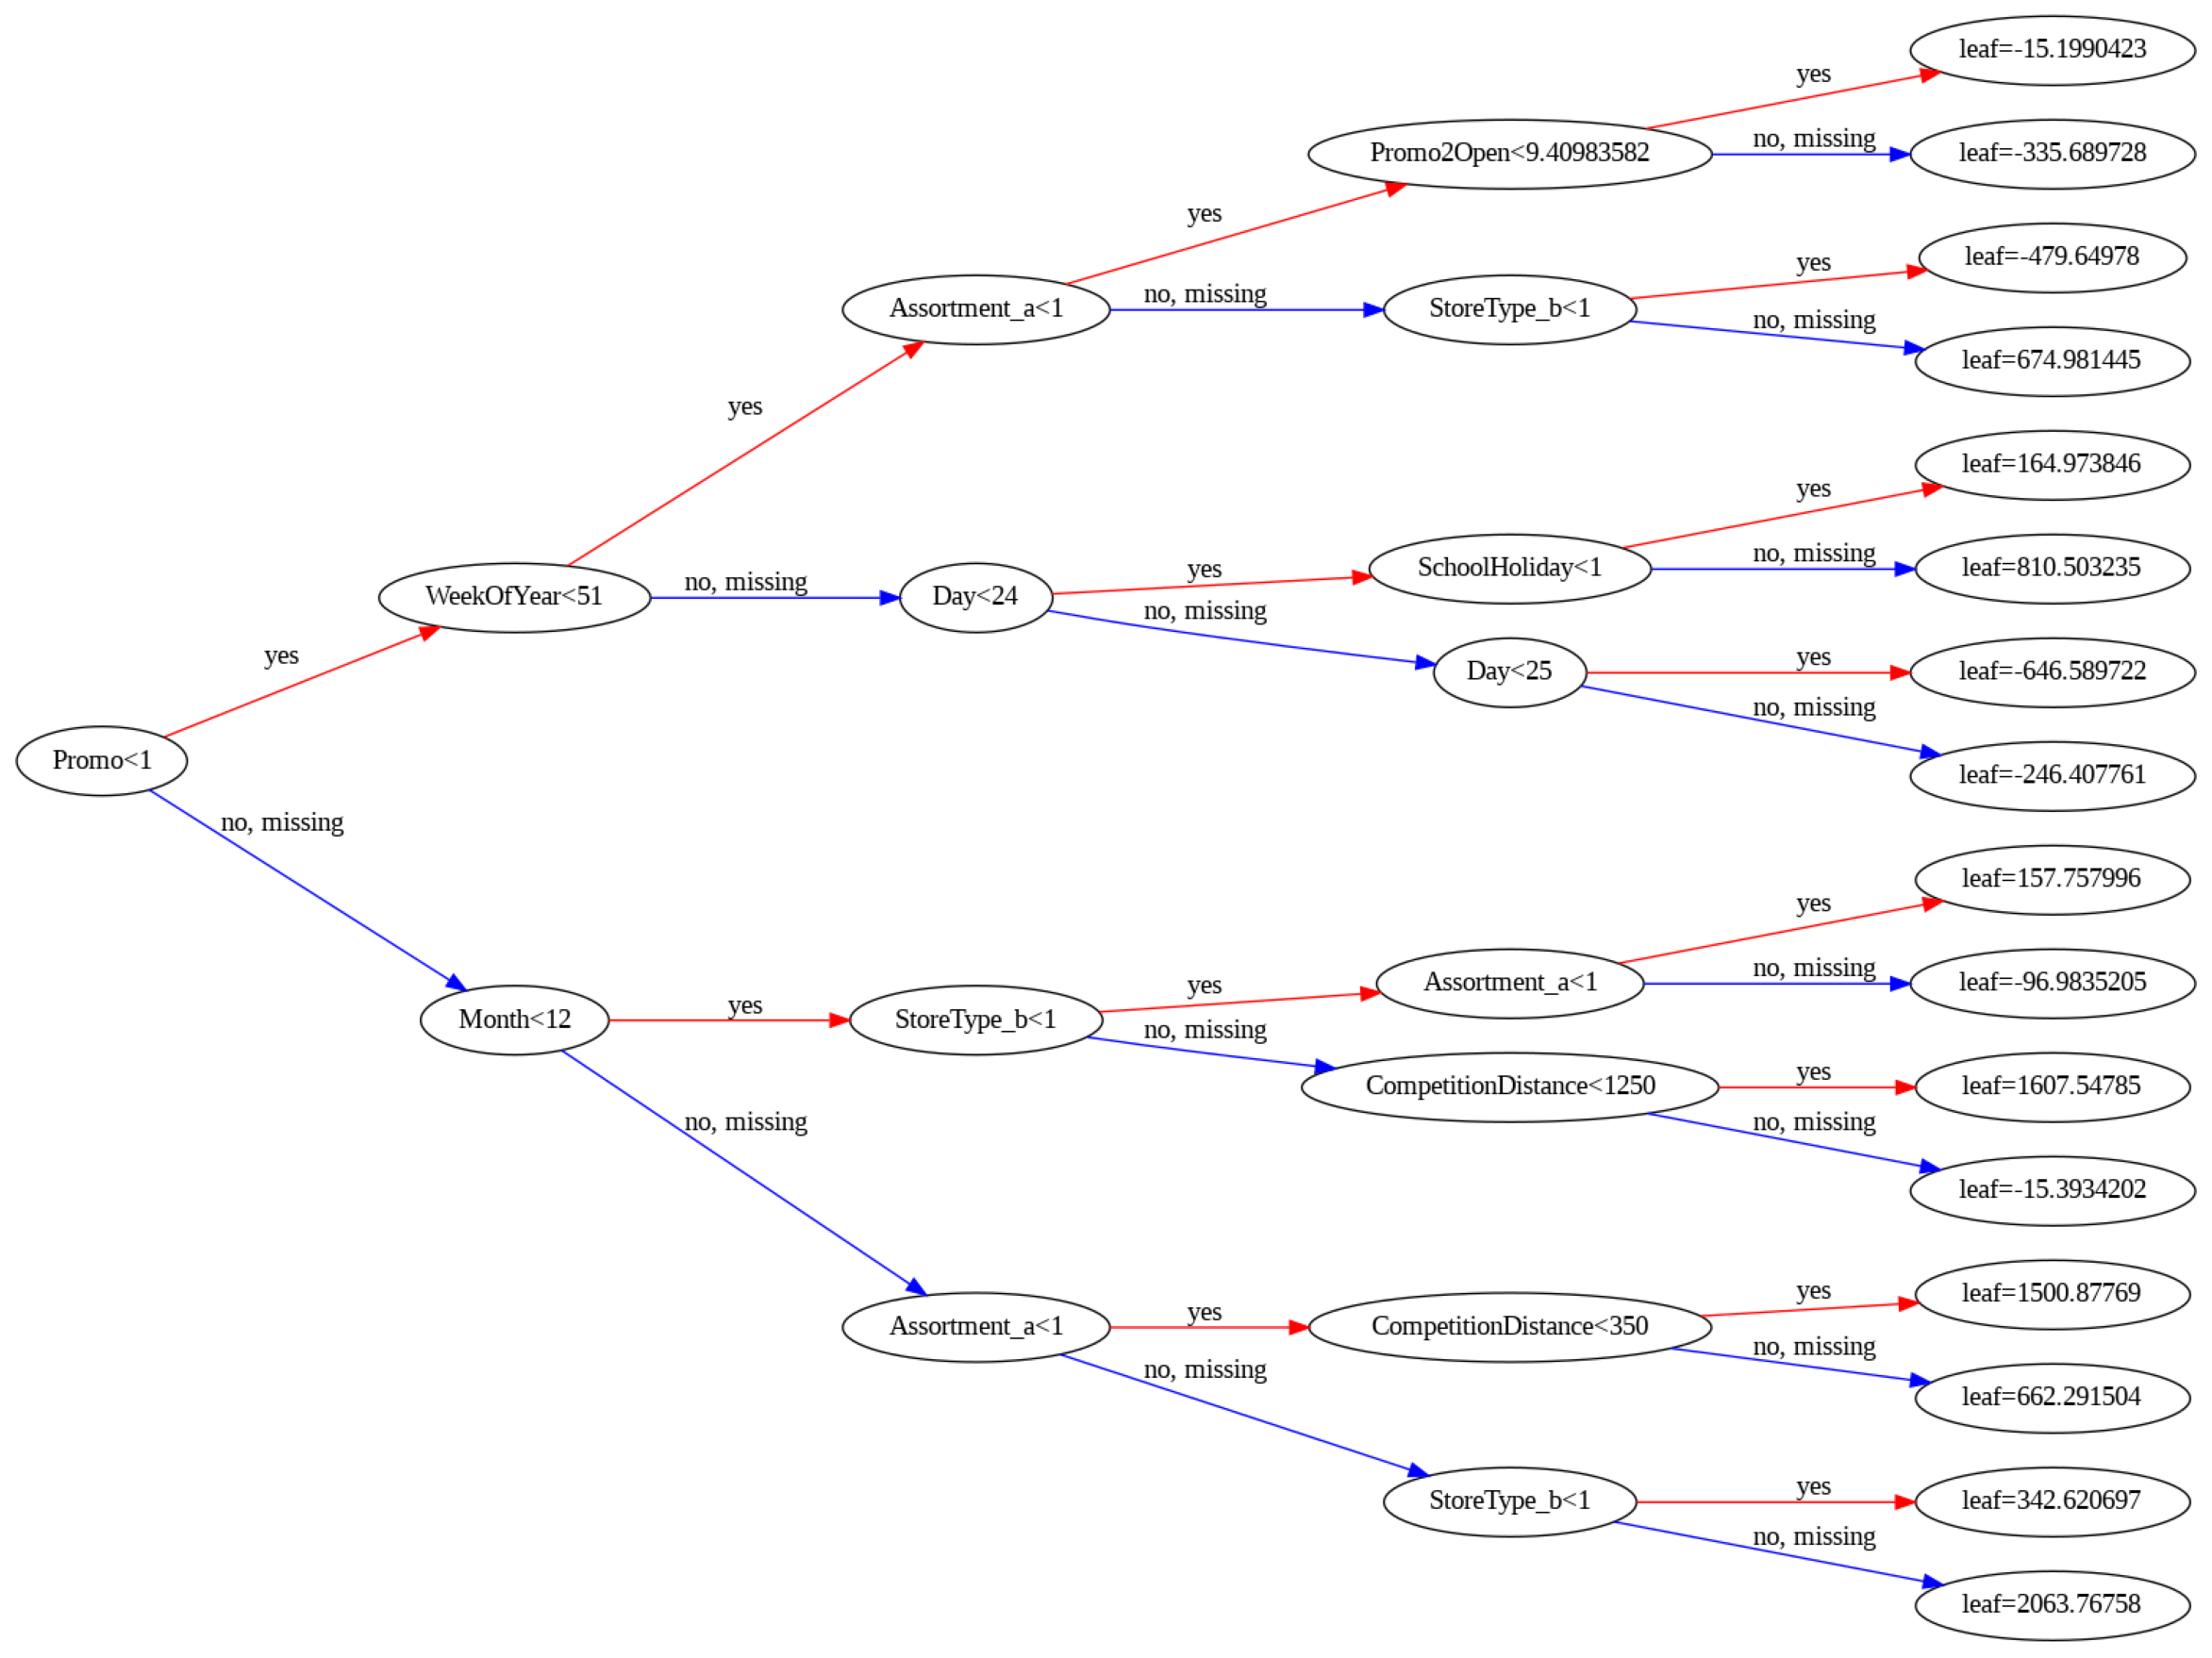

In [130]:
plot_tree(model, rankdir='LR', num_trees=1);

### Feature importance

In [131]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [132]:
importance_df.head(10)

,feature,importance
9,Month,0.163280
1,Promo,0.157194
5,Promo2,0.064385
12,DayOfWeek_1,0.064019
8,Day,0.063350
11,WeekOfYear,0.060069
14,DayOfWeek_3,0.051430
26,Assortment_a,0.051170
2,SchoolHoliday,0.047171
23,StoreType_b,0.038159


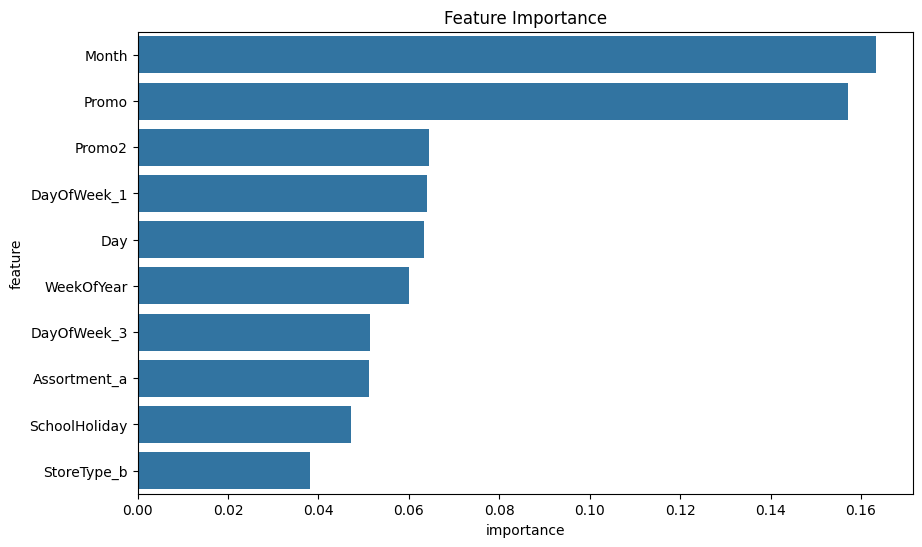

In [133]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### K Fold Cross Validation

In [134]:
from sklearn.model_selection import KFold

In [135]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [136]:
kfold = KFold(n_splits=5)

In [137]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train,
                                                     train_targets,
                                                     X_val,
                                                     val_targets,
                                                     max_depth=4,
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 2547.8540970785593, Validation RMSE: 2366.091397220319
Train RMSE: 2543.2676815467144, Validation RMSE: 2182.2640765956808
Train RMSE: 2533.10293908479, Validation RMSE: 3194.2130486240267
Train RMSE: 2348.6134207229593, Validation RMSE: 3741.584958276372
Train RMSE: 2453.461941828322, Validation RMSE: 3117.711821191946


In [138]:
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [139]:
preds = predict_avg(models, X)

In [140]:
preds

array([7670.508 , 6902.724 , 7621.6123, ..., 6573.107 , 8366.244 ,
       8592.323 ], dtype=float32)

### Hyperparameter Tuning and Regularization

In [141]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [142]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [145]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

####n_estimators

In [146]:
test_params(n_estimators=10)

Train RMSE: 2455.7116076608017, Validation RMSE: 2534.547296855989


In [147]:
test_params(n_estimators=30)

Train RMSE: 1868.8068386005014, Validation RMSE: 1952.551599830335


In [148]:
test_params(n_estimators=100)

Train RMSE: 1078.0325250195376, Validation RMSE: 1204.0609930564149


In [149]:
test_params(n_estimators=240)

Train RMSE: 788.4262013657334, Validation RMSE: 982.2546767514013


####Max_depth

In [150]:
test_params(max_depth=2)

Train RMSE: 2500.895939458497, Validation RMSE: 2561.152670185829


In [151]:
test_params(max_depth=5)

Train RMSE: 1336.782938625415, Validation RMSE: 1418.4630767136662


In [152]:
test_params(max_depth=10)

Train RMSE: 449.7477591661797, Validation RMSE: 1074.4546291025974


####learning_rate

In [153]:
test_params(n_estimators=50, learning_rate=0.01)

Train RMSE: 3088.646467305703, Validation RMSE: 3131.7626027526417


In [154]:
test_params(n_estimators=50, learning_rate=0.1)

Train RMSE: 2263.299692926237, Validation RMSE: 2356.416771286438


In [155]:
test_params(n_estimators=50, learning_rate=0.3)

Train RMSE: 1495.2712964542588, Validation RMSE: 1609.0389989058688


In [156]:
test_params(n_estimators=50, learning_rate=0.9)

Train RMSE: 1061.1186903452412, Validation RMSE: 1203.922028206146


In [157]:
test_params(n_estimators=50, learning_rate=0.99)

Train RMSE: 1059.1969835682123, Validation RMSE: 1219.6844878902084


###Booster

Instead of using Decision Trees, XGBoost can also train a linear model for each iteration. This can be configured using `booster`.

In [158]:
test_params(booster='gblinear')

Train RMSE: 2940.3377357031623, Validation RMSE: 2987.4422170144144


## Putting it Together and Making Predictions

In [161]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000,
                     learning_rate=0.2, max_depth=10, subsample=0.9,
                     colsample_bytree=0.7)

In [162]:
%%time
model.fit(X, targets)

CPU times: user 32.8 s, sys: 450 ms, total: 33.3 s
Wall time: 18.2 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [163]:
test_preds = model.predict(X_test)

In [170]:
submission_df = submission_df.iloc[:len(test_preds)].copy()
submission_df['Sales'] = test_preds

print(submission_df.head())

   Id         Sales
0   1   6756.960938
1   2   7490.643066
2   3   7611.874023
3   4  12184.588867
4   5   5769.266113


In [172]:
submission_df

,Id,Sales
0,1,6756.960938
1,2,7490.643066
2,3,7611.874023
3,4,12184.588867
4,5,5769.266113
...,...,...
33445,33446,7789.375488
33446,33447,10818.933594
33447,33448,8139.413086
33448,33449,20133.546875
